In [1]:
from google.colab import drive 
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import tensorflow

In [3]:
from numpy.random import seed 
seed(1)
tensorflow.random.set_seed(2)

In [4]:
import os, json, csv

def TranscriptExtractor(directory_youtubecsv, directory_transcripts):
    "This Function extracts a list from the dataset with the following string contents: [Video_ID, Video_Category, Video_Transcript, Video_Rating]"

    # first we load in all info from the youtube.csv we need
    os.chdir(directory_youtubecsv)
    with open('YouTube.csv', mode='r') as infile:
        reader = csv.reader(infile)
        youtube_ranked = []

        for rows in reader:
            youtube_ranked.append(rows)
        youtube_ranked_data = {}

    #  youtube_ranked_dat = {'QeHGDr81XwM': '1', 'yPL6jOa6AH8': '1'}
    for listed in youtube_ranked:
        youtube_ranked_data.update({listed[1][32:]: listed[5]})
        
    ## now for the transcript data
    id_cat_transcripts = []

    os.chdir(directory_transcripts)

    # firearms
    with open('firearms_transcript.json') as f:
        data_transcript_firearms = json.load(f)
        
    # here we fill up a dataset with: [ID, Category, Transcript, Final rating] for firearms
    # id_transcripts_firearms = = ['_0ah0X92wdY', '_-Wdwjlu9mY', 'VCS4fXFmCyA']
    id_transcripts_firearms = list(data_transcript_firearms.keys())
    
   
    #id_cat_transcripts: ['_0ah0X92wdY', 'firearms', "do not attempt to m....","1"]
    for id in id_transcripts_firearms:
        id_cat_transcripts.append([id, "firearms", data_transcript_firearms[id], youtube_ranked_data[id]])
        
    

    # fitness
    with open('fitness_transcript.json') as f:
        data_transcript_fitness = json.load(f)
    
    # # here we fill up a dataset with: [ID, Category, Transcript, Final rating] for fitness
    id_transcripts_fitness = list(data_transcript_fitness.keys())
   
    for id in id_transcripts_fitness:
        id_cat_transcripts.append([id, "fitness", data_transcript_fitness[id], youtube_ranked_data[id]])

    # # gurus
    with open('gurus_transcript.json') as f:
        data_transcript_gurus = json.load(f)
    
    # # here we fill up a dataset with: [ID, Category, Transcript, Final rating] for fitness
    id_transcripts_gurus = list(data_transcript_gurus.keys())
    
    for id in id_transcripts_gurus:
        id_cat_transcripts.append([id, "gurus", data_transcript_gurus[id], youtube_ranked_data[id]])

    # # martial_arts
    with open('martial_arts_transcript.json') as f:
        data_transcript_martial_arts = json.load(f)
    
    # # here we fill up a dataset with: [ID, Category, Transcript, Final rating] for fitness
    id_transcripts_martial_arts = list(data_transcript_martial_arts.keys())
    
    for id in id_transcripts_martial_arts:
        id_cat_transcripts.append([id, "martial_arts", data_transcript_martial_arts[id], youtube_ranked_data[id]])

    # # natural foods
    with open('natural_foods_transcript.json') as f:
        data_transcript_natural_foods = json.load(f)
    
    # # here we fill up a dataset with: [ID, Category, Transcript, Final rating] for fitness
    id_transcripts_natural_foods = list(data_transcript_natural_foods.keys())
    
    for id in id_transcripts_natural_foods:
        id_cat_transcripts.append([id, "natural_foods", data_transcript_natural_foods[id], youtube_ranked_data[id]])

    # # tiny houses
    with open('tiny_houses_transcript.json') as f:
        data_transcript_tiny_houses = json.load(f)
    
    # # here we fill up a dataset with: [ID, Category, Transcript, Final rating] for fitness
    id_transcripts_tiny_houses = list(data_transcript_tiny_houses.keys())
    
    for id in id_transcripts_tiny_houses:
        id_cat_transcripts.append([id, "tiny_houses", data_transcript_tiny_houses[id], youtube_ranked_data[id]])

    ## we now have a full set of 600 entries containing all video ID's, categories, transcripts and rankings
    # print(id_cat_transcripts)

    # NOW! let's remove all empty transcripts
    id_cat_transcripts_emptycleaned = []

    for unit in id_cat_transcripts:
        if unit[2] == '':
            continue
        else:
            id_cat_transcripts_emptycleaned.append(unit)

    return id_cat_transcripts_emptycleaned

In [ ]:
# -- coding: utf-8 --
import re
alphabets= "([A-Za-z])"
prefixes = "(Mr|St|Mrs|Ms|Dr)[.]"
suffixes = "(Inc|Ltd|Jr|Sr|Co)"
#starters = "(Mr|Mrs|Ms|Dr|He\s|She\s|It\s|They\s|Their\s|Our\s|We\s|But\s|However\s|That\s|This\s|Wherever|So)"
starters = "(Mr|Mrs|Ms|Dr|He\s|She\s|It\s|They\s|Their\s|Our\s|We\s|But\s|However\s|That\s|This\s|Wherever|When|How|The|and|So|How|a|While|If|You|then|Because|which|What|Where|About|Only|There|Although|Instead)"
acronyms = "([A-Z][.][A-Z][.](?:[A-Z][.])?)"
websites = "[.](com|net|org|io|gov)"


def split_into_sentences(text):
    text = " " + text + "  "
    text = text.replace("\n"," ")
    text = re.sub(prefixes,"\\1<prd>",text)
    text = re.sub(websites,"<prd>\\1",text)
    if "Ph.D" in text: text = text.replace("Ph.D.","Ph<prd>D<prd>")
    text = re.sub("\s" + alphabets + "[.] "," \\1<prd> ",text)
    text = re.sub(acronyms+" "+starters,"\\1<stop> \\2",text)
    text = re.sub(alphabets + "[.]" + alphabets + "[.]" + alphabets + "[.]","\\1<prd>\\2<prd>\\3<prd>",text)
    text = re.sub(alphabets + "[.]" + alphabets + "[.]","\\1<prd>\\2<prd>",text)
    text = re.sub(" "+suffixes+"[.] "+starters," \\1<stop> \\2",text)
    text = re.sub(" "+suffixes+"[.]"," \\1<prd>",text)
    text = re.sub(" " + alphabets + "[.]"," \\1<prd>",text)
    if "”" in text: text = text.replace(".”","”.")
    if "\"" in text: text = text.replace(".\"","\".")
    if "!" in text: text = text.replace("!\"","\"!")
    if "?" in text: text = text.replace("?\"","\"?")
    text = text.replace(".",".<stop>")
    text = text.replace("?","?<stop>")
    text = text.replace("!","!<stop>")
    text = text.replace("<prd>",".")
    sentences = text.split("<stop>")
    sentences = sentences[:-1]
    sentences = [s.strip() for s in sentences]
    return sentences

In [5]:
import os, json, csv

def dataset_shuffler(ourwatched_set_filepath,  dataset_filepath, transcript_filepath, teamA_filepath, teamB_filepath):
        """
        This function collects our transcript data from Marks set and ours, combines it into one
        then stratified-splits it into test_data and training_data.
        :param ourwatched_set_filepath: input the folder where Transcripts2nddataset.csv is located
        :param pickle_filepath: input the folder path where you want to save the training and test set
        :param dataset_filepath: input the folder path where the YouTube.csv is located
        :param transcript_filepath: input the folder path where the JSONs of transcripts are located
        :return: returns two variables, one with test, one with training data, can be called like this: test_data, training_data = dataset_shuffler('D:/School/CSAI/Thesis/Data Exploration Project','D:/School/CSAI/Thesis/Data Exploration Project','D:/School/CSAI/Thesis/Dataset','D:/School/CSAI/Thesis/Dataset/Transcripts')
        also returns two picklefiles in the specified folder containing the same sets.
        """
        import os
        import csv
        import numpy as np
        import pickle
        import sys

        maxInt = int(sys.maxsize/10000000000)
        csv.field_size_limit(maxInt)
        
        
        
        #from my_FunctionsModule_ForThesis import TranscriptExtractor
        #Transcripts = TranscriptExtractor(dataset_filepath, transcript_filepath)
        Transcripts =  TranscriptExtractor(dataset_filepath, transcript_filepath)
        print ("lentrasns",len(Transcripts))
       
        blabla = Transcripts                     #['0dOVZ5TRCUw', 'firearms', "welcome back",'1']

        blabla.sort()

        bla = []
        for item in blabla:
            bla.append([item[2], item[3]])
        new_k = []
        
        #bla  = ["welcome back", '1']
       
       
        
        for elem in bla:
            if elem not in new_k:
                new_k.append(elem)
        bla = new_k
        
        
        #bla : ["welcome back everybody",'1']

        #Transcripts2nddataset = xrhIAf5Pdfc,"We’ve heard a lot ...", 3
        ourwatchedset = []
        os.chdir(ourwatched_set_filepath)
        with open(ourwatched_set_filepath + '/Transcripts2nddataset.csv', 'r', encoding='utf8') as f:
            csv_reader = csv.reader(f, delimiter=',')
            for i, row in enumerate(csv_reader):
                if i == 0:
                    continue
                else:
                    ourwatchedset.append(row)
                 
        
        teamA = []
        os.chdir(teamA_filepath)
        with open(teamA_filepath + '/data_team_a.csv', 'r', encoding='utf8') as f:
            csv_reader = csv.reader(f, delimiter='|')
            for i, row in enumerate(csv_reader):
                if i == 0:
                    continue
                else:
                    teamA.append(row)
                    
        teamB = []
        os.chdir(teamB_filepath)
        with open(teamB_filepath + '/data_team_b.csv', 'r', encoding='utf8') as f:
            csv_reader = csv.reader(f, delimiter='|')
            for i, row in enumerate(csv_reader):
                if i == 0:
                    continue
                else:
                    teamB.append(row)
          
          
               

        os.chdir(ourwatched_set_filepath)
        
        #new_k: ["welcome back everybody",´1´]
        combined = []
        for file in new_k:
            combined.append([file[0], file[1]])
        
        #combined: ["welcome back everybody",'1']

        
                
     

        #for transcript in ourwatchedset:
            #combined.append([transcript[1], transcript[2]])
         #   phrases = split_into_sentences(transcript[1])
            #print ("transcript[1]:",transcript[1])
          #  for sentence in (phrases):
           #     combined.append([sentence, transcript[2]])  
                #print ("phrases:",sentence, "label:", transcript[2]) 
        for transcript in ourwatchedset:
            combined.append([transcript[1], transcript[2]])
        
       
        #for transcript in teamA:
         #   combined.append([transcript[1], transcript[2]])
        #for transcript in teamA:
         #   phrases = split_into_sentences(transcript[1])
            #print ("transcript[1]:",transcript[1])
          #  for sentence in (phrases):
           #     combined.append([sentence, transcript[2]])  
                #print ("phrases:",sentence, "label:", transcript[2])  
        for transcript in teamA:
            combined.append([transcript[1], transcript[2]]) 
        
        #for transcript in teamB:
            #combined.append([transcript[1], transcript[2]])
         #   phrases = split_into_sentences(transcript[1])
            #print ("transcript[1]:",transcript[1])
          #  for sentence in (phrases):
           #     combined.append([sentence, transcript[2]])  
                #print ("phrases:",sentence, "label:", transcript[2]) 
        for transcript in teamB:
            combined.append([transcript[1], transcript[2]])    
            
        
        
        # combined[1] : ["the number one question that we get ove....",'1']
        # combined[-1]: ["I got any problem with the government",'2'] 
        
        #X = []
        #y = []
        #for item in combined:
         #   if item[1] != 'x':
          #      X.append(item[0])
           # if item[1] != 'x':
            #    y.append(int(item[1]))
        X = []
        y = []
        for item in combined:
           
            if item[1] != 'x':
                X.append(item[0])
            if item[1] != 'x':
                #if int(item[1])==2 or int(item[1]==3):    
                if ((item[1])=='2' or (item[1]=='3')):
                    val = 1
                else:
                    val=0
                
                y.append(int(val))
                #print(y.append(int(val)))
                
        
        #print (X[1]) welcome back everybody this is Eri .......
        #print (y[1])    1
        
        X = np.array(X)
        y = np.array(y)

        
        from sklearn.model_selection import StratifiedShuffleSplit
        indiced = StratifiedShuffleSplit(n_splits=20, test_size=0.2, random_state=4)

        for train_index, test_index in indiced.split(X, y):
            X_train, X_test = X[train_index], X[test_index]
            y_train, y_test = y[train_index], y[test_index]

        
        # X_train[1] = if you want to enter the iPad 9.7 .....
        # X_test[1] : [Music]  hi my angels its Haley Reis and today's
        
        #y_train[1] : 1
        #y_test[1] : 0

        training_data = []

        test_data = []

         #training_data[1] : ["if you want to enter the iPad 9.7....",'1']
        for i, item in enumerate(X_train):
            training_data.append([str(X_train[i]), y_train[i]])
       
        # test_data[1] : ["[Music]  hi my angels...",3]
        for i, item in enumerate(X_test):
            test_data.append([str(X_test[i]), y_test[i]])
       

        #import pickle
        #os.chdir(pickle_filepath)
        #with open('training_data.pickle', 'wb') as f:
         #   pickle.dump(training_data, f)
        #with open('test_data.pickle', 'wb') as f:
         #   pickle.dump(test_data, f)
        return test_data, training_data




In [ ]:
y.shape

NameError: ignored

In [6]:
# defining the NLP cleaner (lemmatization, tokenization, stopword removal, remove small tokens, decapitalization and alphanumerical only)
def my_cleaner(text):
    return[token.lemma_.lower() for token in nlp(text) if not (token.is_stop or token.is_alpha==False or len(token.lemma_)<3)]



In [7]:
import numpy as np
import pandas as pd
import pickle
import os
import json
import sys
import nltk
import nltk
import gensim
import multiprocessing
import matplotlib.pyplot as plt

# keras
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.layers import Conv1D, MaxPooling1D, Embedding
from keras.layers import Input, Dense, Embedding, Conv2D, MaxPooling2D, Dropout,concatenate
from keras.layers.core import Reshape, Flatten
from keras import regularizers
from keras.models import Model
from keras.optimizers import SGD, RMSprop, Adagrad, Adadelta, Adam, Adamax, Nadam
from keras.callbacks import EarlyStopping
from keras.layers import Embedding



ourwatched_set_filepath = '/content/drive/MyDrive/thesis final/Tolga_2020-master/Tolga_2020-master/Baseline Resources'

## filepath of: which folder the pickled data should be stored
#pickle_filepath = 'C:\\me\\nl\\TesisML\pickles'

## filepath of: labels of transcripts from ~480 videos (Alfano, et al.)
dataset_filepath = '/content/drive/MyDrive/thesis final/Tolga_2020-master/Tolga_2020-master/Baseline Resources'

## filepath of: transcripts from ~480 videos from (Alfano, et al.)
transcript_filepath = '/content/drive/MyDrive/thesis final/Tolga_2020-master/Tolga_2020-master/Baseline Resources'

#team_filepath = '/content/drive/MyDrive/thesis final'

teamA_filepath ='/content/drive/MyDrive/thesis final'
teamB_filepath = '/content/drive/MyDrive/thesis final'

test_data, training_data = dataset_shuffler(ourwatched_set_filepath,  dataset_filepath, transcript_filepath, teamA_filepath, teamB_filepath)


## Importing SpaCy NLP modules ## With the help of Raf van den Eijnden and Siebe Albers ###
############################################# NLP #############################################
import en_core_web_sm
nlp = en_core_web_sm.load(disable=["parser", "tagger", "ner"]) # # Cargamos el modelo en inglés de spacy


###############################################################################################

print ("=========== Cleaning the transcripts =============")
#  training_data[0]) =  ["because some other......",3]

## Cleaning the transcripts
transcripts_cleaned_train = []
for i, transcript in enumerate(training_data):
    doc = nlp(str(training_data[i][0]))   # Procesando un texto 'because some other .....'
    cleaned_tokens1 = my_cleaner(doc.text)
    transcripts_cleaned_train.append([cleaned_tokens1,training_data[i][1]])

#doc.text: because some other fuckers will say that you were allowed to leave because you agreed .......
#cleaned_tokens1: ['fuckers', 'allow', 'leave', 'agree', 'dirty', 'work', 'leave', 'okay', 'break', 'catch', 'music']
#training_data[i][1]: 3
#transcripts_cleaned_train: [['fuckers', 'allow', 'leave', 'agree', 'dirty', 'work', 'leave', 'okay', 'break', 'catch', 'music'],3]



#test_data[0]) : ["Skrillex! One of the most creative artists as you know...",1]
transcripts_cleaned_test = []
for i, transcript in enumerate(test_data):
    doc = nlp(str(test_data[i][0]))
    cleaned_tokens1 = my_cleaner(doc.text)
    transcripts_cleaned_test.append([cleaned_tokens1,test_data[i][1]])
    
#doc.text: Skrillex! One of the most creative artists as you know .....
#cleaned_tokens1: ['skrillex', 'creative', 'artist', 'know', 'check', 'trick', 'amazing', 'right', 'effect', 'trick', 'release']
#transcripts_cleaned_train [['fuckers', 'allow', 'leave', 'agree', 'dirty', 'work', 'leave', 'okay'],3]

dataset = transcripts_cleaned_train + transcripts_cleaned_test
transcripts = []
rating = []
for j in range(0,len(dataset)):
    transcripts.append(dataset[j][0])
    rating.append(dataset[j][1])
    


max_legth = len(max(transcripts, key=len))   #el token que tenga mayor longitud lo va a arreglar, es la referencia para rellenar con zero
print(max_legth)
#print ("cleaned_transcripts:",len(transcripts_cleaned_train))

#transcripts[0] ['fuckers', 'allow', 'leave', 'agree']


lentrasns 480
=========== Cleaning the transcripts =============
15370


In [ ]:
rating[:]

[0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,


In [ ]:

print()
rating.count(1)

136

In [ ]:
rating.count(0)

348

In [8]:
model = gensim.models.Word2Vec(sentences = transcripts, iter=20, min_count=1, sg=1, size = 300, compute_loss= True, window=5, workers=4, )

#vocab size#train word2vec model


words = list(model.wv.vocab)
print ("Vocabulary size:", len(words))
# save model
filename = 'model.txt'
model.wv.save_word2vec_format(filename,binary=False)

Vocabulary size: 29291


In [ ]:
model.most_similar(["marijuana"])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('mara', 0.6171892881393433),
 ('edible', 0.556893527507782),
 ('cbds', 0.5527786612510681),
 ('manufacturingproduct', 0.5523868799209595),
 ('vulnerably', 0.5437425971031189),
 ('legalization', 0.5431694984436035),
 ('asunfair', 0.5408153533935547),
 ('efficacy', 0.5392718315124512),
 ('nevados', 0.5324071049690247),
 ('cannabis', 0.5323889851570129)]

In [9]:
#LOAD THE WORD EMBEDDING AS A DIRECTORY OF WORDS TO VECTORS
embeddings_index = {}
f = open(os.path.join('','model.txt'), encoding="utf-8")
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:])
    embeddings_index[word] = coefs
f.close()



In [10]:
# Convert the word embedding into tokenized vector
#tokenizer_obj.word_index : {'br': 1, 'movie': 2,...}
#sequences :  [[2,  354,  9]]


from tensorflow.python.keras.preprocessing.text import Tokenizer
from tensorflow.python.keras.preprocessing.sequence import pad_sequences

#vectorize the text samples into a 2D integer tensor
tokenizer_obj = Tokenizer()
tokenizer_obj.fit_on_texts(transcripts) #This method creates the vocabulary index based on word frequency
sequences = tokenizer_obj.texts_to_sequences(transcripts) 

# pad secquences
word_index = tokenizer_obj.word_index     #te da el indice de cada token: A es 1, chao es 2
print ("Found unique tokens", len(word_index))

transcript_pad = pad_sequences(sequences, maxlen=max_legth)  #is used to ensure that all sequences in a list have the same length.
sentiment = np.array(rating)

print ("Shape of review tensor:",len(transcript_pad[0]),"--",len(transcript_pad[100]))   
#print ("Shape of sentiment tensor:",sentiment.shape) 
 


Found unique tokens 29291
Shape of review tensor: 15370 -- 15370


In [11]:
#Map embeddings from the loaded word2vec model for each word

EMBEDDING_DIM=300
#EMBEDDING_DIM=50
num_words = len(word_index) + 1
embedding_matrix = np.zeros((num_words,EMBEDDING_DIM))

for word,  i in word_index.items(): #{'br': 1, 'movie': 2,...}
    if i > num_words:
        continue
    embedding_vector = embeddings_index.get(word) #embedding_vector: ['-0.012481589' '0.007606266' ]
    if embedding_vector is not None:
        #words not foun in embedding will be all-zeros
        embedding_matrix[i]  = embedding_vector


In [12]:
print ("num_words:",num_words)
# Dfine Embedding function using the embedding_matrix
embedding_layer = Embedding(num_words,EMBEDDING_DIM,weights=[embedding_matrix],trainable=True)

num_words: 29292


In [13]:
# train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(transcripts, rating, test_size=0.2, random_state=1,stratify=rating)  
y_train = np.asarray(y_train)
y_test = np.asarray(y_test)

tokenizer_obj = Tokenizer()
tokenizer_obj.fit_on_texts(X_train)

# Convert train and val to sequence
sequences_train = tokenizer_obj.texts_to_sequences(X_train)
X_train = pad_sequences(sequences_train, maxlen=max_legth)

sequences_test = tokenizer_obj.texts_to_sequences(X_test)
X_test = pad_sequences(sequences_test, maxlen=max_legth)


In [16]:
from keras.models import Sequential

In [19]:
from keras.layers import Dense, Input, LSTM, Embedding, Dropout, SpatialDropout1D, Activation

In [21]:
from keras.layers import Conv1D, Bidirectional, GlobalMaxPool1D, MaxPooling1D, BatchNormalization

In [59]:
# instantiate pretrained glove model
model = Sequential()

# add embedding layer 
model.add(Embedding(input_dim =embedding_matrix.shape[0], input_length=max_legth,
                          output_dim=embedding_matrix.shape[1], 
                          weights=[embedding_matrix], trainable=True))
 
# set the dropout layer to drop out 50% of the nodes
#model.add(SpatialDropout1D(0.5))

# add convolutional layer that has ...
# ... 100 filters with a kernel size of 4 so that each convolution will consider a window of 4 word embeddings
model.add(Conv1D(filters=100, kernel_size=4, padding='same', activation='relu', kernel_regularizer=regularizers.l2(0.01)))

# add normalization layer
#model.add(BatchNormalization())

# add pooling layer 
model.add(GlobalMaxPool1D())


# set the dropout layer to drop out 50% of the nodes
model.add(Dropout(0.5))

# add dense layer to produce an output dimension of 50 and using relu activation
model.add(Dense(50, activation='relu', kernel_regularizer=regularizers.l2(0.01)))

# finally add a dense layer
model.add(Dense(1, activation='sigmoid'))

ValueError: ignored

In [ ]:
X_train.shape

(387, 15370)

In [14]:
sequence_length = X_train.shape[1]
filter_sizes = [3,4]
num_filters = 100
drop = 0.4

inputs = Input(shape=(sequence_length,))
embedding = embedding_layer(inputs)
reshape = Reshape((sequence_length,EMBEDDING_DIM,1))(embedding)

conv_0 = Conv2D(num_filters, (filter_sizes[0], EMBEDDING_DIM),activation='relu',kernel_regularizer=regularizers.l2(0.01))(reshape)
conv_1 = Conv2D(num_filters, (filter_sizes[1], EMBEDDING_DIM),activation='relu',kernel_regularizer=regularizers.l2(0.01))(reshape)

maxpool_0 = MaxPooling2D((sequence_length - filter_sizes[0] + 1, 1), strides=(1,1))(conv_0)
maxpool_1 = MaxPooling2D((sequence_length - filter_sizes[1] + 1, 1), strides=(1,1))(conv_1)

merged_tensor = concatenate([maxpool_0, maxpool_1], axis=1)
flatten = Flatten()(merged_tensor)
reshape = Reshape((2*num_filters,))(flatten)
dropout = Dropout(drop)(flatten)
conc = Dense(40)(dropout)
output = Dense(units=1, activation='sigmoid',kernel_regularizer=regularizers.l2(0.01))(conc)

# this creates a model that includes
model = Model(inputs, output)

KeyboardInterrupt: ignored

In [ ]:
filter_sizes[1]

4

In [46]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_6 (Embedding)      (None, 15370, 300)        8787600   
_________________________________________________________________
conv1d_4 (Conv1D)            (None, 15370, 100)        120100    
_________________________________________________________________
global_max_pooling1d_3 (Glob (None, 100)               0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 50)                5050      
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 51        
Total params: 8,912,801
Trainable params: 125,201
Non-trainable params: 8,787,600
______________________________________

In [47]:
from sklearn.metrics import classification_report
import sklearn.metrics as metrics
from keras import backend as K

In [48]:
from keras import backend as K

def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

In [51]:
# Compiling Model using optimizer
#opt = Adam(lr=1e-3)
#model.compile(loss='binary_crossentropy',optimizer=opt)
model.compile(loss="binary_crossentropy", optimizer=Adam(0.01), metrics=['acc', f1_m,precision_m, recall_m ])




In [52]:
callbacks = [EarlyStopping(monitor='val_loss')]

In [53]:
hist_adam = model.fit(X_train, y_train, batch_size=32, epochs=30, validation_split=0.1, callbacks= callbacks)

Epoch 1/30
11/11 [==============================] - 4s 316ms/step - loss: 3.1934 - acc: 0.5840 - f1_m: 0.1519 - precision_m: 0.1184 - recall_m: 0.2314 - val_loss: 2.3020 - val_acc: 0.6410 - val_f1_m: 0.0000e+00 - val_precision_m: 0.0000e+00 - val_recall_m: 0.0000e+00
Epoch 2/30
11/11 [==============================] - 3s 297ms/step - loss: 2.0296 - acc: 0.7374 - f1_m: 0.0000e+00 - precision_m: 0.0000e+00 - recall_m: 0.0000e+00 - val_loss: 1.4389 - val_acc: 0.6410 - val_f1_m: 0.0000e+00 - val_precision_m: 0.0000e+00 - val_recall_m: 0.0000e+00
Epoch 3/30
11/11 [==============================] - 3s 298ms/step - loss: 1.2671 - acc: 0.7152 - f1_m: 0.0065 - precision_m: 0.0327 - recall_m: 0.0036 - val_loss: 1.0804 - val_acc: 0.6410 - val_f1_m: 0.0000e+00 - val_precision_m: 0.0000e+00 - val_recall_m: 0.0000e+00
Epoch 4/30
11/11 [==============================] - 3s 314ms/step - loss: 0.9529 - acc: 0.7291 - f1_m: 0.0317 - precision_m: 0.1147 - recall_m: 0.0205 - val_loss: 0.9562 - val_acc: 0.6

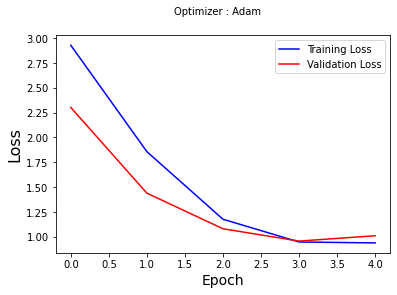

In [54]:
#plotting Loss
plt.suptitle('Optimizer : Adam', fontsize=10)
plt.ylabel('Loss', fontsize=16)
plt.xlabel('Epoch', fontsize=14)
plt.plot(hist_adam.history['loss'], color='b', label='Training Loss')
plt.plot(hist_adam.history['val_loss'], color='r', label='Validation Loss')
plt.legend(loc='upper right')

In [55]:
# evaluate the algorithm on the test dataset !!
base_test_loss, base_test_auc, precision_m, recall_m, f1_m  = model.evaluate(X_test, y_test, batch_size=32)
print('Test Loss:    ', base_test_loss)
print('Test Accuracy:', base_test_auc)
print("Precision:", precision_m)
print("Recall", recall_m)
print("f1_m", f1_m)

4/4 [==============================] - 1s 146ms/step - loss: 0.9325 - acc: 0.7629 - f1_m: 0.2242 - precision_m: 0.6667 - recall_m: 0.1389
Test Loss:     0.9324700236320496
Test Accuracy: 0.7628865838050842
Precision: 0.22424238920211792
Recall 0.6666666269302368
f1_m 0.1388888955116272


In [56]:
y_pred = model.predict(X_test)
print(y_pred)

#prediction = model.predict_classes(X_test_pad)

[[0.32902443]
 [0.22222628]
 [0.32841462]
 [0.23331128]
 [0.4260071 ]
 [0.2959142 ]
 [0.29223526]
 [0.28259736]
 [0.2631759 ]
 [0.3085778 ]
 [0.28028274]
 [0.2678689 ]
 [0.43573752]
 [0.524126  ]
 [0.30986783]
 [0.32962957]
 [0.5847268 ]
 [0.34088314]
 [0.47726336]
 [0.47560394]
 [0.25094482]
 [0.36803797]
 [0.29087073]
 [0.2423505 ]
 [0.33807057]
 [0.38519838]
 [0.25377008]
 [0.2788286 ]
 [0.35461184]
 [0.27208367]
 [0.2540047 ]
 [0.2358968 ]
 [0.3216934 ]
 [0.26424822]
 [0.33493862]
 [0.29388195]
 [0.32789588]
 [0.2527447 ]
 [0.3950676 ]
 [0.38075623]
 [0.2984996 ]
 [0.35508892]
 [0.27933308]
 [0.35841712]
 [0.43358508]
 [0.4748122 ]
 [0.42283598]
 [0.22833844]
 [0.37630805]
 [0.2531994 ]
 [0.23893628]
 [0.2505115 ]
 [0.5438805 ]
 [0.27626935]
 [0.26905826]
 [0.30552945]
 [0.27566695]
 [0.2813296 ]
 [0.25543422]
 [0.26274687]
 [0.27223054]
 [0.31431118]
 [0.5069683 ]
 [0.53617424]
 [0.36331478]
 [0.29637155]
 [0.45346975]
 [0.34148073]
 [0.20707133]
 [0.26226202]
 [0.3022015 ]
 [0.25

In [ ]:
sample_1 = "Beyonce taught us that girls run the world,but sadly the queen bee is gravely mistaken. Throughout history power has always been concentratedin the hands of the few- from the first tribal chieftains and their shamans, to today's politicalelite. But sometimes that power has been held firmlywithin bloodlines, passed down from generation to generation like a very unearned inheritance. Hello and welcome to another episode of TheInfographics Show- today we're taking a look at the most powerful families in the world. 5. Rothschild Family With a name that pops up in nearly every conspiracytheory out there, it's no surprise that the Rothschilds would end up on this list. Whether they are responsible for assassinatingJFK to ensure he didn't invade Cuba and thus destroy the lucrative sugar market, to havingsecretly financed 9/11 on behalf of the aliens from Zeti Reticuli so they could eat our brains-if there's a conspiracy theory out there, chances are the Rothschilds are at the centerof it. With a family history such as the Rothschild'sthough, it's hard to blame conspiracy theorists. Rising from a lowly apprentice working ata small Hamburg bank, Mayer Rothschild displayed from an early age a keen interest and talentfor finances. In no time at all Mayer had made himself aprominent member of the global banking industry, and would go on to install his five sons aroundthe financial capitals of Europe. Overseeing operations from London to Berlin,the Rothschilds helped stabilize international currencies through their lending and bankingpractices with individual governments. While this was generally a good thing as itkept markets stable and people employed, the Rothschilds certainly earned a very prettypenny for their 'charitable' work. As Europe plunged along the industrial revolution,the Rothschilds were there to finance Europe's favorite hobby: waging horrible wars againstitself. Mostly staying on the right side of historythough, the Rothschilds were quick to lend England about 10 billion in today's dollarsto help finance the war effort against Napoleon Bonaparte. By this time the Rothschilds fortune was sovast, and their financial network so elaborate, that they actually received the news of Napoleon'sdefeat at Waterloo a full day before the British government! Such stunning displays of international powerand reach have for long time cast the Rothschilds under extreme suspicion, and they have throughouthistory been blamed for pretty much every major war or other catastrophe, often portrayedas nothing more than money-hungry and evil to the point of profiteering from human misery. The truth however is that the Rothschildswere simply a family extraordinarily gifted in the world of finance, and their charitablecontributions to human society are some of the greatest in history and continue to thisday. Or perhaps the Rothschilds paid us to saythat so that you won't figure out they are secretly working for the Zeta Reticuli alienswho definitely don't want to eat your brains. 4. Rockefeller Family If there's a name synonymous with the internationalpower and intrigue of the Rothschilds, it's the Rockefellers. John D. Rockefeller was born in rural NewYork to a father who was a con man and a mother who was deeply religious. Unlike his shuckster father, John was oftendescribed as a serious, polite, and honest young man, and at age 17 he began workingas a bookkeeper at a small produce firm. Working long hours, Rockefeller delightedin the intricacies of the work, yet had a keen mind for finances and budgeting. Seeing an opportunity with the advent of theinternal combustion engine, Rockefeller started a business partnership with a friend and hisbrothers, going into the business of refining oil at a time when everybody else was busytrying to pump it out of the ground. The discovery of giant oil reserves in Texas,and the growing exploitation of oil in the Middle East made it clear that this new resourcewas the wave of the future, and yet very little infrastructure existed for the actual refiningof oil into fuel and other products. The oil â€˜gold rushâ€™ had seen entrepreneursopen up prospecting and drilling companies around the world, but a growing need for oilprocessing was being unmet. This is where Rockefeller and family cameinto play. Founding Standard Oil in 1870, Rockefeller'swealth exploded, and he would go on to end up controlling 90 percent of America's oilpipelines and refineries. After his family's monopoly was broken upby anti-trust laws in 1911, the Rockefellers continued to hold on to a large share of thenational oil production industry. At the time of this death in 1937, John D.Rockefeller was valued at $340 billion in today's dollars, or four times more than BillGates. However in the time since this record high,a rise in international competition and lack of similar talent for finances by Rockefeller'sdescendants has seen the family wealth plummet down to an estimated $11 billion, though somehowwe suspect that they get along just fine with only 11 billion dollars. 3. Morgan Family Born to a banker it's no surprise that JohnPierpont Morgan would follow in his father's footsteps and become a banker himself. However, unlike his father, John would goon to found one of the world's most important financial institutions, J.P. Morgan & Company. During a scare in 1893 over the outflow ofthe US's surplus gold to foreign nations, the US economy looked set to plummet- butin these dire times John saw an opportunity that no others did. Putting together a syndicate of bankers whichincluded the Rothschilds, Morgan used US bonds to buy back gold from foreign investors, thusrestoring public faith in the dollar and stabilizing the economy. This gold and bond exchange however allowedMorgan to effectively control the US gold supply, which let him finance the creationof US Steel and General Electric while buying out all competitors- effectively taking overtwo of the most important financial sectors of the entire nation: steel and electricity. Morganâ€™s control over the nationâ€™s goldsupply at a time when the national economy- and most global economies as well- were tiedto the gold standard allowed Morgan to manipulate the economy to raise or lower the value ofthe dollar and consumer prices. And despite ensuring a measure of fiscal responsibility,this is overwhelmingly why the gold standard is a bad thing- no matter what your belligerentlylibertarian uncle posts on your facebook wall every other week. Known as an unethical and cutthroat businessman,Morgan bought out, bullied out, or outcompeted any competitors by slashing jobs, reducingwages and generally doing away with anything even remotely related to workplace safety. If it wasn't generating money, it wasn't worthhis time- and after all the nation was full of peasants to replace those killed or maimedin horrific industrial accidents. With no minimum wage laws or workplace safetystandards, Morgan effectively built an empire built on heaps and heaps of exploitation andhuman misery- which by the way, is why minimum wage and workplace safety legislation areimportant things to have. Sometimes government regulations are a goodthing to have, though we tend to forget that since we are so far separated from the miseryof the industrial revolution and its mass exploitation of the average worker. In modern times not much has changed, withJ.P. Morgan widely blamed for helping spread the practices of predatory lending which ledto the 2008 global financial crash. Rumors of the Morgan family being war profiteersand generally banking on any human misery that will make them a single penny are popular-and you know what, given the family's past, this time it's clear that if anybody is cooperatingwith the aliens from Zeta Reticuli to eat your brains it's definitely the Morgans. Yet with such a commanding grip on the globaleconomy, thereâ€™s little the individual consumer can do to avoid engaging in a J.P. Morgan-backedbusiness. 2. DuPont Family Sired by a french immigrant who emigratedinto the United States in the 1800s, the DuPont family has built an empire based on manufacturingand the distribution of industrial chemicals and military munitions. Initially establishing the family businessas a gunpowder manufacturer, DuPont quickly became the largest supplier of gunpowder tothe US military, and would go on to begin creating dynamite in industrial proportions. Like so many other monopolies, the DuPontmonopoly was broken up in the early 1900s under the Sherman Antitrust Act, but the familystill managed to maintain a huge market share of the global munitions industry, having suppliednearly 40 percent of all the munitions used by Allied forces during the First World War. Unlike the Morgan family however, the DuPontsfelt at least some obligation to the nation they were profiting from, and so during WorldWar II when the US Government needed help producing plutonium for the war-ending ManhattanProject, the DuPont company designed and built one of the largest plutonium plants in thecountry, all the while keeping it an absolute secret to prevent the Axis powers from discoveringthe US's research. In the 1950s after the Soviets exploded theirfirst atomic bomb, the DuPont company once more cooperated with the US government tohelp America develop the hydrogen bomb, hoping to keep the US's edge over their Soviet competitors. Working hand-in-hand with the US government,DuPont helped focus the efforts of the nationâ€™s scientists, all the while being handsomelycompensated by the US government of course. The DuPonts may be the second most powerfulfamily in the world, but are surprisingly the subject of very few wild-eyed conspiracytheories- except for one. Blamed for helping spur the US's prohibitionof hemp and cannabis in 1937 in order to protect its paper and nylon manufacturing, the DuPontshave often been the target of those who see overly restrictive anti-marijuana laws asunfair and needless. The widespread use of hemp as a manufacturingproduct would after all cut into the DuPontâ€™s earnings- yet if marijuana was legalized nationally,thereâ€™s little doubt the DuPonts wouldnâ€™t simply immediately engage in the growing andprocessing of hemp products. And with their vast wealth to back their entrepreneurialefforts, they would be doing so from a commanding lead versus any other competitor. 1. The Bush Family Best known for Presidents George W. Bush andGeorge Bush Senior, the Bush family began its climb to international power with PrescottSheldon Bush, a US banker and senator. For years the family was accused of hugelyprofiting from World War II and for having established businesses with corporations thatfinanced Hitler's government, and the reveal of declassified documents in 2003 showed severalquestionable transactions that could have been in violation of the Trading With TheEnemies Act. However after it was revealed in 1943 thata Polish mining interest Prescott Bush was invested in was using forced labor from Auschwitz,Bush distanced himself and engaged in the collection of funds for the victims of thewar. The rest of the Bush family hasn't escapedscrutiny though, with both presidents having been blamed for profiting from the wars startedunder their watch. These allegations may be a bit more of a stretchthan those against Prescott Bush however, as it's well known fact that George Bush Sr.was very reluctant about starting a war against Iraq, and it was the consistent prodding fromBritain that finally spurred him to action. Whatever the case, having had two membersbecome presidents of the most powerful nation on earth has garnered the family internationalprestige and connections, making them without a doubt the single most powerful family alivetoday. Which of these families is truly the mostpowerful in the world? How delicious exactly are your brains- wehave friends from out of town"
sample_2 = "outer space the final frontier and the ultimate conspiracy theory flat earth don't groan I can hear this online community claims that 2000 years of scientific consensus that we live on a globe is a lie and that the earth is flat why do they think this and how can they prove it I wanted answers so I spoke to one of the leaders of the New Zealand Flat Earth movement Adrian and Morrison so what is the Flat Earth 3d that means that you do not believe that we'd love on a spelling giant ball of water that it's actually physically impossible do you believe 100% that flavour is true absolutely a hundred percent what you're sitting on here if true is one of the greatest breakthroughs in scientific history it's not a breakthrough it's it's what is because most people just realizing that because you're brainwashed people are losing the whole lives over this for speaking out are you in danger for doing speaking on the show I could possibly be do you have a gun no crossbow is the Beast why's crossbow the best silent it's almost terrifying Chevy where's my car be terrified you know being to God as part of your human nature but that doesn't bother me because the truth is more important than my life it's just such a big conspiracy that I can't a conspiracy theory at all it's fair okay you saying it's fact and you say you've got proof where's the proof if you could see the whole earth which you can't because of atmospheric got nothing else but Photoshop CGI and paintings but do you have Photoshop and cgo and paintings I feel like you guys don't even have that am i doing a bad job the interview oh I'm saying anything you don't want to hear no okay okay I was thinking it I'm sorry okay just let me be me okay okay I'll let you be you where'd you get this confidence wrong as you because we've got the evidence and the proof and everything but the other side says they've got the evidence and the proof as well well we're challenging them to find the curve they're challenging you to find the flat no it's our question they're the ones that says they're going into space why don't I makes sense and it's not right that people are being lied to and deceived just because they're evil and rich but who is deceiving us who is lying to us follow the money right back fifty two million dollars a day is given to these lawyers the Photoshop paintings and CGI well no starving in Africa there's no criminal trial that's what we're saying it's being tested that's being done and when it is no I'm living in an idiot instead of rebooting on how about I take you outside right now and absolutely prove to you that the moon is not a spherical solid ball if I'm excited this do it okay do the Sun damn what do you mean damn it's behind the clouds ah sometimes you see the whole moon you're saying that no one can answer this question cuz I'm sure a scientist could quickly answer their question I'm still questioning the moon we've got it are you a scientist yes I have a four year degree in Freddie's education from where from myself you gave it yourself look up every day in the sky there's certain days with the Sun and the moon will be very close together just don't look at the Sun because that will hurt your eyes will look at the moon well that's another thing they tell us that's correct we photosynthesize through our eyes nothing we're all looking at the Sun I dare you to look at the Sun right now I'm looking at the side I just don't know if I can trust you how do I trust you and not the people who are telling indoctrinating me well why don't you believe in me as a human being I want to be believed in I wanted to believe in Adrian but Judy clouds I wasn't convinced so I agreed to come to fix Bo a flat earth conference she was organizing featuring the star of the recent Netflix play earth documentary mark Sargent this was the biggest Flat Earth Expo in New Zealand history Flair's conviction hello yeah no no no no field hockey mate that's where it's at oh is the flat earthers I've gone to the wrong room I'd ended up at the flat turf Expo but two doors down I was opened up to a world of flat earth I don't know what's crazier your flat earth t-shirt or your Warriors shorts probably honest it's a wild ride supporting the worries so what are we on right now first yeah now I get it and what is it what shape is that flat with a dome over top with the cellular stars at the top yep see my cup of tea tells me it's flat because when I drink my cup of tea water goes back to where it should and the cup of tea it's round like this right it's it's sort of like a it's like a pizza and so when you sell around the world you get into the salami then you take a little turn to the chicken and you carry on around a bit further two different you know what I mean and the Scriptures say the scriptures you've got to go back to the book and the book I'm talking that's the Bible Jesus Christ all right we can't be going back to the Bible can we for like a scientific reasoning I'm not saying the Bible scientific concur I'm saying I take the Bible as little truth that sounds bad what sort of religion are you well I kind of got asked to leave yeah so I bet I'm on my own I'm forming my own sick now let you take my hand out okay can we get one now or afterwards well as I said they're in my bag and that in effect well I can but obviously there's more than one thing in there the more people I spoke to the more skeptical and frustrated I became it was unprofessional but when the time came from my big interview with Mark sergeant I just didn't give a anymore you're one of the biggest dick swingers in the flat earth game so no offense and when I said no offense it means you can't get offended by what I say I want this is the dumbest I've ever heard in my life yeah and your whole life is a lie I've heard that before I became a flat earther because I tried to disprove it or do you bunk it but do you not think the reason you can't debunk it is because you're a what yeah no I'm pretty clever problem-solver how do you prove the earth is flat by not finding the curve so Flat Earth is not something you can prove it's just something it's just you can disprove the realm go exactly it's bad these rules its lawyers rules the stars and the planets are just pretty pretty little lights Sun in the moon or just bigger lights like what is it an LED display uh probably little better than that okay this is ridiculous okay sorry sorry I don't mean to be it's okay you of you this can't even exist on its own it needs a solar system the Sun and galaxy around that and universe around the no one needs a  LED screen don't take my word for it do your own research ask some questions so you and a Netflix documentary yeah and how'd that go it went pretty well we shot bad bad okay I'm trying to put a positive spin on this turned out our biggest recruiting tool to date in fact a third of the 18 or 24 s we're on board with this and they also Paul which one people who died no the well Athena girl Mark had one good point it didn't matter what I said the more negative publicity they got the more the flat earth movement was growing I had to stop them I had to prove them wrong but first I had to thank Adrian for her lovely hospitality I don't know if I agree with everything you've said Adrian you're enough but I'm surprised that you put on such a good festival so well done thank you guy we're having a dinner tonight we're gonna celebrate I'm doing a few songs we could collaborate on something we could do like a debate rappy thing do it now I do a now I've been told since I was a child that the earth is round I agree with the science and I'd love all the rules and if you don't know that you don't deserve to be in school whoa but the earth is flat you see the horizon line 360 degrees just fine and you can see that you can't the moon I'll head up there her on see um so the int no I have something wrong with it finish it bring her home sorry ah well you do something an Ultron okay not too loud I'm coming at you with a round globe and if you do not love that then you are a snob to believe in science is a load of bull to believe in that you're just a lying fool learning filling my mind with knowledge yeah I love guns guns do this anymore did I win him he probably did I've spent the data Flair ethics bow and I was losing my mind there was only one way to prove that the earth was a globe I had to do an experiment but when I couldn't organize an actual scientist at short notice I went on the background telling website and hired an actor to play a scientist now what is your knowledge of science just general knowledge I guess give me an example of a piece of information that you have frogs can leap up to 2.5 meters I think it's so good to know I was kind of hoping for more like science-based knowledge hmm so it's ears on your profile or that you can go Canadian accent as well yeah so come on guys we're gonna go down to the rink to play some pond hockey come on guys let's go to the pond to play some ping pong he's so cheap Canadian accent yeah and soos here you can do a British accent as well yeah give me some of your British accent in place Oh Porter that's really good stuff better this really good stuff sunset pea heart Beach with the help of Adrian we formed one of the least qualified research groups that the world had ever seen I've been studying the flat earth now for about two months and I'm not convinced but everyone told me to do my own research and today I'm doing my own research you're proud of me yes I think so and I'm happy that you've invited me out Roman would you like to elaborate what we're doing yes so basically what are we doing is we're watching the Sun as it goes down and then before I goes down we go and go it is going and in the country room and you can see it Firmin shut the up shut the up okay sorry about this the basic idea of the experiment is that when the Sun goes below the horizon we're going to move to a higher vantage point and when we're out there we should be able to see the Sun again which would - the curvature of the earth or the flatness of the earth well we'll just have to see what happens all we had to do was wait we standing on the precipice of the biggest breakthrough in scientific history Flat Earth expert Adrienne scientific impersonated Roman and year 11 physics not achieved Guy Williams this was the moment the world had been waiting for but moments before sunset everything changed the sun has disappeared behind the clouds that ruins our experiment ever no we would devastate it there was nothing left to say a place we can be sure that the Frog can jump 2.5 meters high if I learned anything about science of my time with Adrian it was that sometimes clouds get in the way were they seeded by NASA to stop us discovering the truth I guess we'll never know Guy Williams New Zealand today "
sample_3 = "the Joe Rogan experience are you aware at all of the current state of surveillance and what if anything has changed since your revelations yeah I mean the the big thing that's changed since I was uh in in in in 2013 is now its mobile first everything mobile was still a big deal right and the intelligence community was very much grappling to get its hands around it and to deal with it but now people are much less likely to use laptop then use a desktop than then use you know god any kind of wired phone than they are to use a smartphone and both Apple and Android devices unfortunately are not especially good in protecting your privacy I think right now you got a smartphone right you might be listening to this on a train somewhere and in traffic right now or you Joe right now you got a phone somewhere in the room right the phone is turned off or at least the screen is turned off it's sitting there it's powered on and if somebody sends you a message the screen blinks to life how does that happen but how is it that if someone from any corner of the earth dials a number your phone rings and nobody else's rings how is it you can dial anybody else's number and only their phone rings right every smartphone every phone at all is constantly connected to the nearest cellular tower every phone even when the screen is off you think it's doing nothing you can't see it because radio frequency emissions are invisible it's screaming in the air saying Here I am Here I am here is my IMEI I think it's individual manufacturers Equipment Identity and IMEI individual manufacturers subscriber identity I could be wrong on the break out there but the the acronyms are the IMEI and the IMSI and you can search for these things there are two globally unique identifiers that only exist anywhere in the world in one place right this makes your phone different than all my other phones the IMEI is burned into the hand side of your phone no matter what SIM card you changed to it's always gonna be the same and it's always gonna be telling the phone network it's this physical handset the IME SI is in your SIM card right and this is what holds your phone number right it's the basically the key the right to use that phone number and so your phone is sitting there doing nothing you think but it's constantly shouting and saying I'm here who is closest to me that's the cell phone tower and every cell phone tower with its big ears is listening for these little cries for help and going alright I see Joe Rogan's phone and I see Jaime's phone I see all these phones that are here right now and it compares notes with the other network towers and your smart phone compares notes with them to go who do I hear the loudest and who you hear the loudest is a proxy for proximity for closeness distance right they go whoever I hear more loudly than anybody else that's close to me so you're gonna be bound to this cell phone tower and that cell phone tower is gonna make a note a permanent record saying this phone this phone handset with this phone number at this time was connected to me right and based on your phone handset and your phone number they can get your identity right because you pay for this stuff with your credit card and everything like that and even if you don't right it's still active at your house overnight is still active you know on your nightstand when you're sleeping it's still whatever the movements of your phone are the movements of you as a person and those are often quite ly uniquely identifying it goes to your home it goes to your workplace other people don't have it sorry and anyway it's constantly shouting this out and then it compares notes with the other parts of network and when somebody is trying to get to a phone it compares notes of the network compares notes to go where is this phone with this phone number in the world right now and to that cell phone tower that is closest to that phone it sends out a signal saying we have a call for you make your phone's start ringing so your owner can answer it and then it connects it across this whole path but what this means is that whenever you're carrying a phone whenever the phone is turned on there's a record of your presence at that place that is being made and created by companies it does not need to be kept forever and in fact there's no good argument for it to be kept forever but these companies see that is valuable information right this is the whole big data problem that we're running into and all this information that used to be ephemeral right where were you when you were 8 years old you know we're worried where'd you go after you had a bad breakup you know who did you spend the night with who'd you call after all this information used to be ephemeral meaning it disappeared right like like the morning dew it would be gone no one would remember it but now these things are stored now these things are saved it doesn't matter whether you're doing anything wrong it doesn't matter whether you're the most ordinary person on earth because that's how bulk collection which is the government's euphemism for mass surveillance works they simply collected all in advance in hopes that one day it will become useful and that was just talking about how you connected phone network that's not talking about all those apps on your phone that are contacting the network even more frequently right how do you get a text message notification how do you get an email notification how is it the Facebook knows where you're at you know all of these things these analytics they are trying to keep track through location services on your phone through GPS through even just what wireless access points you're connected to because there's a global constantly updated map there's actually many of them of wireless access points in the world because just like we talked about every phone has a unique identifier that's globally unique every wireless access point in the war right UK promote them at home whether it's in your laptop every device that has a radio modem has a globally unique identifier in it and this is standard term you can look it up and these things can be mapped when they're broadcasting in the air because again like your phone says to the cell phone tower I have this identifier the cell phone tower responds and says I have this identifier and anybody who's listening they can write these things down and all those Google Street View cars that go back and forth right they're keeping notes on whose Wi-Fi is active on this block right and then they build an in a giant map so even if you have GPS turned off right as long as you're connected to Wi-Fi those apps can go well I I'm connected to Joe's Wi-Fi but I can also see his neighbor's Wi-Fi here and the other one in this apartment over here and the other one in the apartment here and you should only be able to hear those four globally unique Wi-Fi access points from these points in physical space right the intersection in between the spreads the domes of all those wireless access points it's a proxy for location and it just goes on and on and on we could talk about this for four more hours we don't have that kind of time can I ask you this is there a way to mitigate any of this personally I mean is me shutting your phone off doesn't even work right well so it does in a way it's just no um the thing was shutting your phone off that is a risk is how do you know your phone's actually turned off it used to be when I was in Geneva for example working for the CIA we would all carry like drug dealer phones you know the old smart phones there sorry old dumb phones they're not smart phones and the reason why was just because they had removable battery backs where you could take the battery out right and the one beautiful thing about technology is if there's no electricity in it right if there's there's no go juice available to it if there's no battery connected to it it's not sending anything because you have to get power from somewhere you have to have power in order to do work but now your phones are all sealed right you can't take the batteries out so there are potential ways that you can hack a phone where it appears to be off but it's not actually off it's just pretending to be off whereas in fact it's still listening in and doing all this stuff but for the average person that doesn't apply right and I got to tell you guys they've been chasing me all over the place I don't worry about that stuff right and it's because if they are applying that level of effort to me I don't probably get the same information through other routes I am as careful as I can and I use things like Faraday cages I turn devices off but if they're actually manipulating the way devices display it's just too great a level of effort even for someone like me to keep that up on a constant basis also if they get me I only trust phones so much so there's only so much they can derive from the compromise and this is how operational security works you think about what are the realistic threats that you're facing that you're trying to mitigate and with the mitigation that you're trying to do is what would be the loss what would be the damage done to you if this stuff was exploited much more realistic than worrying about these things that I call voodoo hex right which are like next level stuff and actually just a shout out for those of your readers who are interested in this stuff fun I wrote a paper on this specific problem how do you know when a phone is actually off how do you know when it's actually not spying on you with a brilliant brilliant guy named Andrew bunny Huang he's an MIT PhD and I think electrical engineering called the introspection engine that was published in the Journal of open engineering you can find it online and it'll go as deep down in the weeds I promise you it as you want we take an iPhone 6 this was back when I was fairly new and we modified it so we could actually not trust the device to report its own state but physically monitor its state to see if of spying on you but for average people right this academic that's not your primary threat your primary threats are these bulk collection programs your primary threat is the fact that your phone is constantly squawking to these cell phone towers it's doing all these things because we leave our phones in a state that is constantly on you're constantly connected right airplane mode doesn't even turn off Wi-Fi really anymore it just turns off the cellular modem but the whole idea is we need to identify the problem and the central problem with smart phone use today is you have no idea what the hell it's doing at any given time like the phone has the screen off you don't know what it's connected to you don't know how frequently it's doing it Apple and iOS unfortunately makes it impossible to see what kind of network connections are constantly made on the device and to inter mediate them going I don't want Facebook to be able to talk right now you know I don't want Google to be able to talk right now I just want my secure messenger app to be able to talk I just want my weather app to be able to talk but I just checked my weather and now I'm done with it so I don't want that to be able to talk anymore and we need to be able to make these intelligent decisions on not just an app by app basis but a connection by connection basis right you want let's say you use Facebook because you know for whatever judgment we have a lot of people might do it you want it to be able to connect to Facebook's content servers you want to be able to message a friend you want to be able to download a photograph or whatever but you don't want it to be able to talk to an ad server you don't want it to talk to an analytic server that that's monitoring your behavior right you don't want to talk to all these third-party things because Facebook crams they're garbage and almost every app that you download and you don't even know what's happening because you can't see it right and this is the problem with the data collection used today is there is an industry that is built on keeping this invisible and what we need to do is we need to make the activities of our devices whether it's a phone whether it's computer or whatever more visible and understandable to the average person and then give them control over it so like if you could see your phone right now and at the very center of his green icon that's your you know handset or it's a picture "
sample_4 = "I'm here today to tell you that yourgovernment is keeping you divided. With trust in institutions in itsall-time low and the concept of objective truth seemingly harder to agree upon, conspiracy theories are flourishing. The people that areperpetrating this hoax and the people that really run this world, they're not gonnalet go of all that power easily. No one has an official nomination for a trusted sourceof mainstream media. The mother of all conspiraciesis surely the Flat Earth. There is no curvature on this earth,it cannot be measured. But how do you knowthat you live on a globe? Can you prove it? I know I'm not crazy so why should Ibe bothered if somebody says I'm crazy? We're not spinning around on the ball. It's not a clear-cut line. Does the horizon stay to your eye level? I can't remember. Or do you simplytrust the evidence you've been shown? Assuming such a lie would be too big. Well, I can see the curve. Yeah, sure you can. Over the past few years, Flat Earthcommunities have sprung up online. Not only sharing research supporting theirtheories but often incorporating conspiracies that for many are far moredangerous. From vaccinations to Sandy Hook. But when I visited truth-seekerDave Murphy near his home in Sussex, he seemed keen to distance himself from anyformal grouping of globe denials. I'm not part of any movement, I'm just a guy whoknows the earth's flat. Describe for me if you will,what your beliefs are? I personally believethat we live on a big disc of water, there's a North Pole in the centreand all the continents are strung around it. And the edge is what we call Antarctica. Beyond that, who knows what's down there? So this is where anywhere is beyond here, there isn't anywhere â€¦Does that make sense? If this is a realm over 3D space and time, well there can't be anythingoutside it because that implies, you know, 3D space and time. But that only applies here. Right, I wonder if you could describe to meyour circumstances â€¦ When you startedto look into this? I've spent the last 15 yearslooking for truth. I was at 9/11, you know, I stood there watching it and accepted it for whatI saw. Just like everybody else. It wasn't until about four years later thatI figured out that it can't have happened the way I saw it. I mean I washaving my midlife crisis about that time. Everyone gets to that point in theirlife, you know, around about 40 odd that you start wondering, you know, what isthis all for? What am I doing here? Dave took me down to the beach to showme the most simple Flat Earth experiment. A curvature calculation. Batteries? I took the battery out. There should be just under three feetof curvature, hiding of the lighthouse. Do you feel like the mainstreamscientific community will concede to â€¦? They can't because it means then almost thethe breakdown of civilisation. If you realise that the Earth's flatwell then hang on, why are we sending things up into space? There is no space,where's all this money going to? What's the point? The reason behind allthis deception is they've relegated us to a microbe, a speck of dust in aninfinite void with nothing in control. Powerful people who have got more moneythan us, can now say, 'you do as we say'. How did your family take the news? My son went off and did his own research, came back and he said,'yeah, now I agree with you.' And my ex-wifeactually thinks I'm crazy, she thinks I'm mentally ill. It's not craziness, it'sliterally what a true scientist should be like. Should be open to everything. Before you became a flat-earther,did you feel part of society? Now increasingly I'veremoved myself from this society because it's a wicked society, it's evil in places. You just have to turn on thathypno-box, you know, in the corner and every night you see the wickedness coming out of it. Do you everhave any doubt? I've seen so much now that I can't, I can't seeit any other way. Why am I standing here?I'm a 50-year-old man, I could easily be sitting at home watching the Formula One or someother mindless activity. In Hyde Park Speakers' Corner, truth-seekers gather tospread the word. There are no spinning balls in space. Balls in space come down. Play a game of football,eventually that ball will come down. There's no ifs and buts. There's one up and there's one down. This is Roxanne Glen,a relative newcomer to the world of Flat Earth activism. The first time I came here and the first time I got heckled by a bunch of trolls, I really had to question whatit was I was doing. I realised, you know, this is actually an argumentto fight that I am having here. Is this my fight? And then I went home, pondered on it and went back to mymundane job, doing my mundane tasks and realised that no, it is. The more you genuinelytake time looking into it, the more it's like opening up Pandora's box,it's like, you peel back one lie and then you realise, 'oh they haven't been completely honest about that either'. But then why lie? Why do all that? Why not just be honest with us? Is this a growing movement? Yes, yes. I think it is very much so. The public interest in it I think it's definitelygrowing as well, especially with thechildren, they're not buying into everything that they're shown on TV, like I did when I was that age. What's changed? We didn't have YouTube. Thanks to Trump, they are all walkingaround going, 'you are fake news!' If someone like Trump wasn't inoffice, I don't think even people would be critically thinking about the media. Roxanne and her friends have been ontour across the UK for the past seven weeks. You must get some funny looks. Yeah, but good looks as well. There was a lot of people who beepedand gave us a thumbs up. Really? I was invited to the end of tour partyat a school in west London. Complete with speeches, musicand a glacier mint cake. Despite their vocal distrust of themedia, several people were keen to share their ideas. So pretend there's a dinnerplate stood in the middle so on the outside, you spin it,if there's something outside you'll zoom off. Right. Stood in the middle, you don't. And then I did the curvature calcand I realised that the curvature calc said 240ftshould have been missing from a 30ft elevation. And a 123ft from the 1ft observationsand that's what clicked then because that's 49%. I've gone as far back as the Egyptian bibleand the scriptures and I am reading these and to me,when I'm reading these words, you know, these aren't the words of someonewho's trying to deceive us. These are the words of someone who was tryingto help and guide us. So imagine spinning at 1000 miles/hour, at the edge of a roundabout,how tight would you have to hold on? I feel like I'm holding on pretty tight now. We've got to the end of this tour now and we've positively started a massive waveof conversation for people. This is not about Flat Earthbut it's about you. We're trying to all find that feeling, what we're all missing, which is love. So in the name of love,let's keep telling people that it is flat. Thank you, thank you. Do you think that the Flat Earth provides someclarity where previously there has been fuzz and mess and complexity? Yeah, I do think it provides a bit of clarity. I am on a journey, I'm also goingthrough surgery at the moment, on my face, because I got a fracture on my facethat no one knows about. Yeah, I was involved in a horrendous attack, still standing, nearly lost my life though. Went to court, got done for it, been there, done, that was back in 2008. I was knocked out for three weeks by the hospital to repair, in a drug-induced coma. And yeah, I'm still standing. Still fixing myself from that and yeah that's got nothing to do with Flat Earthbut you know â€¦ But doesn't it though, I mean do you feel that this there's â€¦ is there's something in â€¦? Maybe so. It may have changed, kind of your outlook, have changed your willingnessto investigate things. I mean, who knows, right? Maybe so, yeah. I do believe that, I do believe thatsometimes your life experiences mould you into the path you end up going on, orthe pursuit of truth that you're going on â€¦ So, yeah, you're probably quite right with that. For Roxanne to still be undergoing surgery for the physical scars of domestic abuse a decade ago, was shocking. To say nothing of the emotional impact of such a breakdown in trust. Singing: We know now, that the Earth's not round That it don't spin round because the truth's been found. Despite the celebratory feel tothe event, this was still a fairly small gatheringof committed activists. For a taste of the Flat Earth on a bigger scale, I flew to Denver, Colorado, to join 800 paying guests at the Flat Earth International Conference, the biggest of its kind to date. The world's going to watch,they're going to be amazed, they're going to be blown away at not the conspiracy theories,the conspiracy facts. We're all with the facts. Next to the main auditorium, flat-earthers from all overwere exhibiting their wares. And we leave it alone and it will just be still. How can that hang upside downanywhere in the world? That's down to gravity though, isn't it? Well, in the imagination. It's opposite, and we're going to be movingin opposite directions. and that's where you get â€¦ We're going to get stuck. The day and night. I mean, how does a lunar eclipse work? That I am not sure about. This is a rocket. What was the idea with this? Basically I just wanted to do a mana vertical launch. But what's that got to dowith the flat earth? Nothing, nothing. In the conference itself,a familiar face was drawing the crowds. So what dropity is, it's the tendencyfor things to fall when you let go of them. You're a bit of a star here, right?I mean, come on, don't be modest. Lots of people have come up to you. I mean people come up tome and said they've come all the way from, you know, Sweden and placeslike that just to see me. We've got a photographer now. He can't move anywhere, he's the man isn't he? He says the truth. 'He says the truth', there you go,what do you think of that? I am just doing what I have to do. Dave, I love you. Thanks a lot, bro. You better get back to your adoring fans now. I don't want to sort of takeany of your time â€¦ You shut up. Do you want me to slap you? Dave wasn't the only star attractionon the bill at this Flat Earth Woodstock. Another speaker,Denver's own Bob Knodel. How is everybody doing? Beside your eardrums are bleeding, I understand. Bob, great to meet you. Nice to meet you too. Unlike many of the people I met at the conference,whose Flat Earth beliefs stem from a literal interpretationof the Old Testament, Bob's approach is based on scientificrationalism. I've always been a little bit different,I've always seen the world a little bit different. I was put in special schools, they said that you knowI had a genius IQ which, whatever, but I had a hard time relatingto other people and the world in general. I never was able to understand whythe world seems to be so messed up, you know? Why all these wars, why all thekilling, why do they spend so much money on things like this, when they could justspend that same money and fix the problems? If you were shown conclusiveproof of a globe earth with your own eyes, how would you feel and wouldyou be able to adjust your viewpoint to match? Honestly, I would be relieved,I would be because that would mean that this nightmare is over. Is it a nightmare? It is. It is a nightmare because we're going againstthe entire belief system of the entire world. I certainly do not want tobe in the position that I'm in, you know, being ridiculed, being fired from jobs â€¦ Nobody wants thatand the only reason I do it is because I truly care about thefuture of humanity. Bob took me up to the Red Rocks Amphitheatre, on the edge of the Rocky Mountains to cast a view out over the flat horizon. What are your hopes and expectations forthe future of Flat Earth? My hopes are for all thisto go through as seamlessly as possible, without, you know, bloodshed andwithout you know too much conflict. But the people that really run this worldare not going to let go of that power easily. In the short term, things aregoing get a lot worse before they get better but when things do start getting better, we're going to go into what I would terma more utopian type of world instead of a dystopian-like worldthat we're clearly headed for. Everyone I've spoken to, when you really boil it down, what people want isthe same as what anyone wants, to have some sort of agency to be relevant "
sample_5 = "my name is Richard Kerr and I'm 53 and I believe my first time being trafficked to England was on February of 1977 Richard Carr has suffered for over 30 years in silence blocking out the horrors of his past at the hands of what he describes it's very powerful people as a teenager he was introduced to the world of Westminster he says he was trafficked from Northern Ireland and that this picture was taken by one of his abusers I was used as a boy toy I was an object a sexual object rumors of an alleged pedophile ring in the top echelon of society have been circulating for years but for the first time Richards account of what happened to him as a boy links three locations Dolphin Square a luxury complex popular with MPs and civil servants kink or a boys home in Belfast where boys were systematically abused and elm guest house a former gay brothel where young children are also said to have been molested we brought Richard back to England from America along with his counselor to revisit his past his memories were vivid and distressing the pro a cottage industry of conspiracy theories has built up around this story but Richard insists a VIP pedophile ring did exist and it's time for the truth to be told they were man who had control and power over others they were politicians he believed some some I do his story starts in Belfast in the 1970s at the now notorious kink or a boy's home he was placed in care from the age of five and sent to King Cora at 14 where he was abused there he claims he and two other boys were hand picked to be trafficked to London and sexually abused by further men both of them he says have since taken their own lives we were for always that's how I felt I felt after all away I was exploited Richard says in 1977 when he was 15 he was put on a ferry to Liverpool abused by a man there then escorted to Manchester and later sent to London claims he was picked up in a car at Kings Cross station taken to a hotel close by and forced to have sex with multiple men I had no way to get to England I had no money you know I was under the state Kerr they were responsible for me I had no one else to turn to this is the place that I remember very well and the memories that I tried to block many many years ago how do you feel about that boy you remember here very emotional very painful sorry it scared he says he's faced years of intimidation and is still being warned not to talk by people he believes are connected to the alleged pedophile ring some of his sharpest memories are of the fear he felt and he says he was visited by detectives on two separate occasions and told to keep quiet they told me to stop stop talking about Kim Cora and that same day they intimidated me here there is another place where they they in in Preston Lancashire they told me they could put me away myself he claims he was trafficked across the UK including two Rochdale Lancaster Manchester and Wolverhampton but it's here at Elm guesthouse in South London that he says he faced his most violent experience it was raided by police in 1982 newspapers at the time said that at least three MPs were questioned it's claimed the late Sir Cyril Smith was a visitor it was being used as a gay brothel and it was alleged children as young as 10 were abused it's the first time Richards being back and the flashbacks come fast I was tied up here I do I do remember that I don't know why I was tied up but I was tied up with with with my hands behind my back I do remember that Lane died and he took photographs they took foot other men were here other man came into the room it just wasn't this one man you're up there of the other man here in the 80s it was reported officers found whips chains and ropes I don't mean to be this way it happened you know I I just don't mean to be it's just holding on all this sometimes that I can't believe this happened in the 1970s in Piccadilly Circus Richard said he was picked out from a group of boys sitting upstairs inside the wimpy fast-food restaurant would you describe the activity round here as a pedophile ring oh you've no yeah there's no question about that oh yes definitely why they had convinced of that because of the people I was involved with uh and the boys were in groups even though we were spread across the tables and the way they set it up the clients and locations one of the locations he claims he was taken to in a taxi was an apartment complex in the heart of Westminster known as Dolphin square it is now at the Nexus of the Met police's operation Midland which is also looking into alleged murders I could have been 16 15 17 I remember going in with this guy man he told me to sit down relax and explain about his glasses and he said he had liked Waterford crystal and he wanted me to have a brandy and we had more brandy and then we had sexual encounter in here did you ever meet any of the men that have been named to have had alleged contact with young boys uh I just don't want to get into that right now I really don't I'm talking to my attorneys legal and why is that why don't you want to talk about it yeah I'm still concerned there are some people still arrive and I'm concerned most of these people were very well-off but most of them had decisions of par that had influence over others why don't you feel yet after all these years that you can name your abusers who were in power I'm still in some fear even though I'm willing to take the courage I need to know that I could have faith in our government and central to achieving that trust he says is getting the government to acknowledge what he calls the untold story of King Cora boy's home that he claims goes way beyond Northern Ireland in 1981 three senior staff at King Cora were convicted of abusing eleven boys there's been two judge led inquiries but allegations of a high-level cover-up continue despite claims that abuse in King Cora was connected to England the Home Secretary Theresa May has so far ruled out including it in the official child abuse inquiry Rhine I when they're not willing to bring King Cora into Westminster that just tells it that the message that sends to me is that just there's some kind of cover-up and her husband it's claimed British security services knew about the crimes in Belfast but did nothing to stop them using the knowledge to blackmail and extract intelligence from influential men in 1975 as the troubles were taking hold a young army intelligence officer called Brian Gamal was working undercover and tried to blow the whistle we brought Richard to meet him for the first time you must be Richard yeah I'm Brian Richard it's good to meet you come on in let's talk come on in brian says he put in an official report about King Cora to a senior mi5 officer but to his astonishment and claims he was ordered to stop digging and forget about it that's the thing that hits me they have I really pushed the thing through in 7576 you could have been rescued I'm sorry thank you thank you for that uh I'd be in a lot of pain that's suffering and uh I have survival kit guilt yeah yeah yeah and yeah it's uh it's a calling I I believe it's a calling and I'm not here this is a selfish less selfish of myself I'm not here to think of me right yeah I get peace from that yes masculine Jesus name Amen but it's hard to heal without the truth and Brian now believes to establish that King coram must be added to the UK inquiry why do you think it should be I think um two words Richard care I think Richards transporting over to the United Kingdom mainland to be abused rather than just being abused in Northern Ireland speaks volumes it ties the two together here's a Concordat knows what goes on in Dolphin Square do you think there was still efforts to try and cover up I do Richard is open about the fact he went on in his adult life in London to be paid for sex with men it was he says the only life he knew he later emigrated to America would you concede that you became a male prostitute uh I would answer it this way I didn't become they made that's what they made me to be I had no awareness that I would be be that they shaped me grim me and that's what my life was he says he's decided to speak out now for his two friends trafficked with him no longer alive to tell their tales it's not about me it's about the voices that didn't have a voice and I'm just I don't know my spirit is a driving me and he has this message for the Home Secretary Theresa May I want those who's responsible brought to justice yes we can't fail on this we just can't if we do this now if we fail on this we are a lioness to continue that they can get away from this because people have decided to turn the other way the idea those inside the corridors of power were part of a sophisticated uk-wide pedophile ring has been dismissed by some but Richard is adamant there was one and that he is living proof you"
sample_6 = "on the phone it is a pleasure to welcome Nikko Hines he's the London editor of The Daily Beast and we are talking to him in London at the moment Nikko welcome to the program so this this story is incredibly disturbing that you've published in The Daily Beast I guess it was about a week ago it is about a VIP paedophile Network that was I guess I don't know embedded is the right word but it was within the British government tell us how this this story came to light well how it come out is a really important part of this whole alleged cover-up all the way back in the mid 1980s and there were allegations and rumors about senior members of the British government and about what they may or may not have been getting up to in their private time you have to remember this is a very different world back then the homosexuality had only been legalized relatively recently and the age of consent was 21 so there was a kind of a shadowy ke world in any case so some of these kind of more serious or I shouldn't comparison but because there was a veil of secrecy and a veil of criminality and some people's private lives this was somehow allowed to go on unchecked yet there were rumors now media newspapers some of whom tried to cover this at the time but they were never able to either because the police rushed in to stop them or just because of Britain's very strict libel laws if you're going to make an accusation that somebody was breaking the law and in such a serious way you have to have a lot of proof in all this bill to back up your assertion now so this this this scandal or I should say this this paedophile Network we're not talking I mean are you are you saying that the the we're talking about 20 year olds and it is or are we talking about young children here no we're talking about people from the earliest age that I've seen in the allegations has gone to the police about nine years old so yeah we're talking about serious serious claims the reason I mentioned the older people is just because it gives some context to understand there was a place called dolphin square which was which is located near Westminster near the houses and a lot of MPs lived there because obviously they have their lane owned in the parts of the country that they come from and that they represent them when they're in London to do political business they have flats in this place and it was known that there were some gay parties that had older people in them that were partially secret but what is now being alleged is that there were in fact serious pedophile rings also operating in this okay so let me let me get let me let me just see if I can I can clarify your point here is that because this was at a time where there was I guess essentially gay people were emancipated in some way at least in the context of the law that there was still sort of these vestiges of a a social I guess perspective where you don't really look into what's going on in the personal lives of people because what they may be engaged in may be technically illegal but is not necessarily problematic and some of that I guess modus operandi sort of intersected with what was a which was clearly a different species ie you know pedophilia but those sort of constructs were still sort of like we're blurred because of that it just gave a cover story so you knew that people MP senior MPs who works for the Margaret Thatcher government we're going off doing things that they didn't on everyone to know about but you just kind of assumed that it was something that was technically illegal or perhaps round upon or you know this is a common there weren't publicly gay MPs so you just imagined that what they were doing was actually perfectly reasonable behavior even if it was technically illegal but in fact it now turns out that there were serious crimes being committed okay so in 1983 you write Geoffrey Dickens a controversial MP I'm not clear obviously as an American I'm not two up on my on the the profiles of members of parliament particularly in the 80s but the odds for that matter but he handed a file containing the names of alleged perpetrators to Leon Brittan who was Leon Brittan the Home Secretary which I suppose the most similar position in the u.s. would be kind of director of Homeland Security or something like that someone who's in charge of Britain's police Britain's intelligence agencies but also kind of border control so a very very very influential person in terms of someone who was able to put in place kind of was able to use his influence to make sure that those law enforcement agencies were following his well okay and and so what did he do with this would this I guess this this file of claims hotly contested things that's one and run on this now Geoffrey Dickens publicly said that there was a suggestions of there being a pedophile ring in London amongst politicians at the time now most people thought you know Geoffrey Dickens was a kind of outspoken flamboyant kind of guy most people thought he was probably exaggerating or that they'd gotten the wrong end of the stick nobody necessarily took his claims seriously nonetheless he passed his his dossier of evidence to Leon Brittan my own separate and nothing publicly was ever heard again from that now we subsequently found out that he wrote to Geoffrey Dickens and later to explain that his officials did find enough evidence in there to consider it worthwhile to carry out further investigations but that's the last that we hear about it the whereabouts of that file has is a great mystery there was an investigation last year ordered by the current British government to try and discover where that fire was and that file has been destroyed now we don't know who destroyed it we don't know when it was destroyed but the fact that it is no longer in existence okay and we should say that this this guy Briton Leon Brittan has passed away I mean is that why okay and then tell us who Don Hale is and and what was his role in I guess this revelation newspaper editor he worked in Barry so outside of London and the reason he kind of comes into the story is because he's one of his local politicians who was a senior naval politician at the time went to him and said look I've got evidence about these Peter phone rings now she wasn't necessarily saying that these people all active Peters also she was saying that there was a group called the paedophile information exchange which was working with in Westminster kind of promoting or working for to improve Rights for pedophiles she had evidence that these people were working with in weaving Westminster she wanted the big national press to run a story about it but they were all too scared to run a story about it so she went to her local MP sorry her local newspaper a guy who she knew well done Hale and gave him and that evidence he was skeptical and at least worried about how he'd be able to use the story but he thought at least this thing I can do is like a monastery saying you know well-known local politician barber Castle is worried that there's a pedophile ring in Westminster and she says that it's being investigated by the British government he thought he'd get away with doing that so he started to make a few calls to those some of those people named in the dossier you know sooner did he do that but any politician arrived at the office the very next morning threatening him shouting at him demanding that he hand over the files he refused to hand over those files and then the very next day and police officers from something called Special Branch which is a sort of high up intelligence cold war-era police super squad arrived at the office and took away all the papers took away all the evidence and said that if he were to ever repeat anything that was found within these stolen documents that he would be jailed Wow and so he he didn't I mean how did how do we know his story today well he considered thinking he decided that you know it was a fair cop in a sense because he knew that these documents were stolen or at least we're not supposed to have been shown outside of the Home Office they had you there for your eyes only and classified written on the papers so he knew it was true that he would could get in trouble if he used them and he didn't have any way to prove that these allegations were true so even when he was approached a few years later by the news of the world the famous tabloid newspaper in Britain and blowing from Murdoch about similar allegations he refused to repeat them again then because he was afraid you know he had a family didn't want to go to jail it was only when this story began to really explode in 2012 in Britain when an MP used parliamentary privilege which means you're allowed to make claim against that ended would be considered libelous written in the newspaper it was published or discussed in the radio he used parliamentary privilege to say in the British House of Commons that some of these allegations ought to be examined and that then kicked into gear the British media into really investigating him really examining some of these things and the crucial difference is that quite a lot of these men have subsequently died and so you're now able to repeat some of these allegations which we never proved in a court of law at the time Wow and so I mean and he and so following I guess the the member of the House of Commons sort of saying that we need to more investigation this hail reports this stuff where where is it where where are we now with this or I should say before we get to that how much did Margaret Thatcher I mean how high up did this go that's again something that more and more details of that are emerging as the week's go on at the moment because people are plunging back through the archives and finding old reports finding or classified files and individuals who were involved with Margaret Thatcher are starting to speak out so we had a body one of her bodyguards has come out and said that he warned her about one of her close aides that lots of allegations were made against him we know that Sir Peter Heyman who was one of the top guys mi6 but he named one of Britain's main spy agencies was also caught with Peter for material we know that she was told about that and we can see in her in her hand on a note that was found earlier this year that she says that this shouldn't be made public and then just wait a second I'm sorry what is that last part this she found there was a no OA note that she wrote in her and her handwriting that's right saying that this shouldn't be made public so she knew that these allegations have been made she knew that this guy was responsible not for abusing children but for having pedophile obscene materials and she and she wrote to one of her advisers oh no no no let's make sure this doesn't this doesn't come out it then emerged this weekend that another of these high-profile abusers a man called steel Smith and I advise your listeners to look him up because he's one of the most extraordinary looking him you'll ever see huge fat man weighed about 400 pounds and that used to wear kind of the big bracelet and suspenders he looked he looked kind of like a cartoonish figure of a bad guy and it turned out he wasn't that guy something what something like several hundred complaints were filed against him by boys over a period of decades and again she was she was warned that allegations have been made against him of this nature and she went ahead and gave him a knighthood anyway so he he died as Smith so what is happening I mean how much is this I mean I had your story frankly is the only reporting I've read about this in this in the states here there may be other pieces I just haven't I haven't come across them it's certainly not a story that is making big ribbon so how big of a the story is this in Great Britain I mean it I mean it just seems I mean there's two things that seem really sort of shocking to me one is the cover-up two is you know what why are there so many pedophiles in in and around these governmental positions I mean this is just yeah I it just seems bizarre to me in both instances but what what kind of response are you getting in Great Britain it's one of those things that bubbled and bubbles and bubbled and it's actually I think the it's one of the upsides of the Internet and people being able to publish information and share information in a way that was never possible before so what you had in there the eighties and perhaps in the early 1990s "
sample_7 = "in America connections are everything it is secret societies that provide the highways which grant members lifelong access to the dark corridors of power skullenbones is one such network emanating from a temple tomb at Yale University and stretching all the way up to George W Bush himself [Music] we met a wall of secrecy when we called past members to uncover the story of skullenbones many try to deny all knowledge of the private club formed in 1832 the symbolism of course is the skull and crossbones right the deaths head or totem cop I guess as they as the SS called that during the Second World War it's a very sinister symbolism it is obviously free masonic but now the club's rituals and old boy networks are coming to light most people want to get along to gain power and prestige and they know the way to do that is to listen to the guy above you so if someone say in skullenbones calls people he knows and these people know what the powers gone bones it all it takes is a hint or suggestion what we have here is a private network acting merely in violation of the United States Constitution infesting the White House the National Security Council the State Department the Pentagon the CIA and other government institutions and yet all this power stems from the lifelong bonds formed in the skullenbones rituals where an oath of secrecy is sworn you know how it all started out and the emissaries of the various secret societies would come up behind them tap them on the shoulder and say something like skullenbones do you accept and generally of course they did accept and then the as the people were tapped they then left the courtyard and proceeded to the vault like or mausoleum like headquarters of these secret societies that I think since has been abolished or moved indoors or somehow is no longer so easy to observe as it might have been say 50 or 100 years ago part of the problem is source of information we have very little about bones from the tomb itself and most comes indirectly such as an article written by a student that went to to Yale and actually lived in the Jonathan Edwards dorm and he had this to say it was part of the Jonathan Edwards folklore that on the April evening following tap night at bones if one could climb to the Tower of we're hall the odd castle that overlooks the bones courtyard one could hear strange cries and moans coming from the bowels of the tomb as the 15 newly tapped members were put through what sounded like a harrowing ordeal returning alone to my room late at night I would always cross the street rather than walk the sidewalk the past right in front of bones even at that safe distance something about it made my skin crawl if you were invited to join the tomb cults you became part of the East Coast anglo-saxon elite joining the Rockefellers the Harriman's and the bushes and so the the core as you go through the early 20th century is comprised of 15 or 20 families partially from old-line American families going back to the Pilgrims and partially from money conversation at that level is all off the record there's no press involved so it's like the men are getting kind of a first-hand understand he may not be any big trade secrets or anything but they're getting this kind of off-the-record understanding of the way things are or the way things should be and I think this certainly gives them an advantage in the world in the economic world because you know you know what the directions are what the movers and shakers are thinking and what some of the major policy considerations that are being considered are there any famous members or well-known members need George Bush and yet membership of skull and bones seems to result in remarkable careers among its members are three presidents a clutch of judges CIA officials and various tycoons they swear to take care of each other's interests and they do it and when that that in the normal conduct of life is probably okay but when one of them becomes president of the United States it's time to ask questions what have you sworn to do for your brothers and what interests are you pushing that our really on their agenda not on the agenda the American people's George W Bush has been asked about his membership of the skullenbones with Bush we reached the bottom of the barrel in terms of American politicians you have to look at him again and again and say how did this guy make it bonesman help fund George w's extraordinary rise to power spending millions on a bush billboard campaign in key swing states no family has produced more Club members than the Bush's nine members of the Klan including Bush's father the 41st president are among its alumni devotees are supposed to leave the room if the Society's name is mentioned in case they betray its secrets okay mm you ever met Lucia Bush senior's skullenbones name was Magog the name given to the most sexually experienced bondsman George ee is known as temporary since he was too lazy to change his initial name skullenbones is just one of many secret societies scattered around the United States there's still dominate the paths to power in San Francisco there is the men only Bohemian Grove Club you have a group that sees itself as superior to all others within society and I think that is the element which is carried over from Skull and Bones into these organizations this superiority this is what happened when we tried to film at the Bohemian Grove Club founded in 1872 by media and businessman modern day members have included Ronald Reagan and Henry Kissinger well okay we got the hospitality the negative hospitality of the San Francisco Bohemian Club there have been cases where people have written about the club and or snuck in dirk matheson from People magazine stuck snuck in and was actually spotted by a by a Time Warner executive and expelled from from from the club I mean from the Grove and he in fact lost his job six months later although they they claimed that it wasn't related to that but it was certainly a coincidental these secret networks have also taken their elitist mentality a stage further skullenbones and George Bush Senior have both been linked to the uther genex movement belief in the superiority of the anglo-saxon race and fellow bones Ian Averell Harriman has been strongly implicated with US business funding for Hitler in the 1930s are they done no there's all that tradition and it has to be protected and it has great wealth to protect and how do they protect it they'll find new means they'll they'll hold offices they'll hold a point of offices and elective offices and they will be in charge of huge amounts of money that's gone above today is one of a number of groups it happens to be now a semi semi secret group if this is one secret organization and I was fortunate enough to get the membership list how do I know or anybody know they're not other secret groups where I've known nobody else has had the membership list so we also have to take the hypothesis in mind that there could be other groups which are truly secret nobody here is aware of their existence which have this which have this purpose [Music] "

test_samples = [sample_1,sample_2,sample_3,sample_4,sample_5,sample_6,sample_7]

test_samples_tokens = tokenizer_obj.texts_to_sequences(test_samples)
test_samples_tokens_pad = pad_sequences(test_samples_tokens,maxlen=max_legth)
model.predict(x=test_samples_tokens_pad)

array([[0.998931  ],
       [0.999987  ],
       [0.9999753 ],
       [0.99938   ],
       [1.        ],
       [0.28023592],
       [0.99969375]], dtype=float32)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

print ("Y_test:",X_test.shape) 
print ("predicted:",y_pred.shape)


y_pred_bool = np.argmax(y_pred, axis=1)


print(classification_report(y_test, y_pred_bool))

Y_test: (824, 15370)
predicted: (824, 1)
              precision    recall  f1-score   support

           0       0.80      1.00      0.89       656
           1       0.00      0.00      0.00       168

    accuracy                           0.80       824
   macro avg       0.40      0.50      0.44       824
weighted avg       0.63      0.80      0.71       824



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [57]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
# print classification report 
print(classification_report(y_test,y_pred.round()))

              precision    recall  f1-score   support

           0       0.76      0.99      0.86        70
           1       0.83      0.19      0.30        27

    accuracy                           0.76        97
   macro avg       0.80      0.59      0.58        97
weighted avg       0.78      0.76      0.70        97



EXTRAS

In [ ]:
print ("train...")

import time
print ("Begin:",time.strftime("%d/%m/%y %I:%M:%S"))

# Fitting Model to the data
callbacks = [EarlyStopping(monitor='val_loss')]
hist_adam = model.fit(X_train_pad,y_train, batch_size=400, epochs=25, verbose=2, validation_data=(X_test_pad,y_test),
         callbacks=callbacks)  # starts training


print ("End:",time.strftime("%d/%m/%y %I:%M:%S"))

train...
Begin: 29/11/20 12:01:06
Epoch 1/25


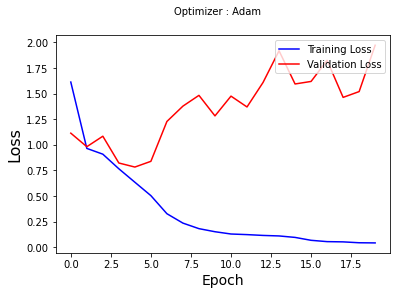

In [ ]:
#plotting Loss
plt.suptitle('Optimizer : Adam', fontsize=10)
plt.ylabel('Loss', fontsize=16)
plt.xlabel('Epoch', fontsize=14)
plt.plot(hist_adam.history['loss'], color='b', label='Training Loss')
plt.plot(hist_adam.history['val_loss'], color='r', label='Validation Loss')
plt.legend(loc='upper right')

In [ ]:
# Compiling Model using optimizer
opt = SGD(lr=0.01, momentum=0.9, decay=0.0001)
model.compile(loss='binary_crossentropy',optimizer=opt)

# Fitting Model to the data
callbacks = [EarlyStopping(monitor='val_loss')]
hist_sgd = model.fit(X_train_pad,y_train, batch_size=400, epochs=5, verbose=2, validation_data=(X_test_pad,y_test),
         callbacks=callbacks)  # starts training

Epoch 1/5
1/1 - 31s - loss: -4.0007e+00 - val_loss: -5.9909e+00
Epoch 2/5


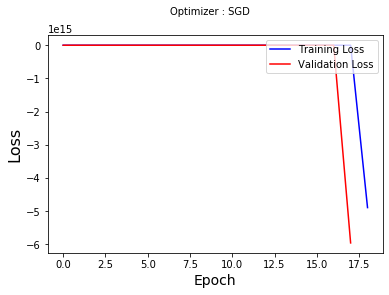

In [ ]:
#plotting Loss
plt.suptitle('Optimizer : SGD', fontsize=10)
plt.ylabel('Loss', fontsize=16)
plt.xlabel('Epoch', fontsize=14)
plt.plot(hist_sgd.history['loss'], color='b', label='Training Loss')
plt.plot(hist_sgd.history['val_loss'], color='r', label='Validation Loss')
plt.legend(loc='upper right')

In [ ]:
# Compiling Model using optimizer
opt = Adadelta()
model.compile(loss='binary_crossentropy',optimizer=opt)
# Fitting Model to the data
callbacks = [EarlyStopping(monitor='val_loss')]

hist_adad = model.fit(X_train_pad,y_train, batch_size=400, epochs=20, verbose=2, validation_data=(X_test_pad,y_test),
         callbacks=callbacks)  

Epoch 1/20
1/1 - 1s - loss: 0.6907 - val_loss: 0.7045
Epoch 2/20
1/1 - 0s - loss: 0.7381 - val_loss: 0.7019
Epoch 3/20
1/1 - 0s - loss: 0.6953 - val_loss: 0.6994
Epoch 4/20
1/1 - 0s - loss: 0.7214 - val_loss: 0.6968
Epoch 5/20
1/1 - 0s - loss: 0.7194 - val_loss: 0.6942
Epoch 6/20
1/1 - 0s - loss: 0.7218 - val_loss: 0.6916
Epoch 7/20
1/1 - 0s - loss: 0.7123 - val_loss: 0.6890
Epoch 8/20
1/1 - 0s - loss: 0.6898 - val_loss: 0.6864
Epoch 9/20
1/1 - 0s - loss: 0.6617 - val_loss: 0.6838
Epoch 10/20
1/1 - 0s - loss: 0.7195 - val_loss: 0.6812
Epoch 11/20
1/1 - 0s - loss: 0.7237 - val_loss: 0.6786
Epoch 12/20
1/1 - 0s - loss: 0.7131 - val_loss: 0.6759
Epoch 13/20
1/1 - 0s - loss: 0.6813 - val_loss: 0.6733
Epoch 14/20
1/1 - 0s - loss: 0.7054 - val_loss: 0.6707
Epoch 15/20
1/1 - 0s - loss: 0.7279 - val_loss: 0.6680
Epoch 16/20
1/1 - 0s - loss: 0.6915 - val_loss: 0.6654
Epoch 17/20
1/1 - 0s - loss: 0.6670 - val_loss: 0.6628
Epoch 18/20
1/1 - 0s - loss: 0.7079 - val_loss: 0.6601
Epoch 19/20
1/1 - 0

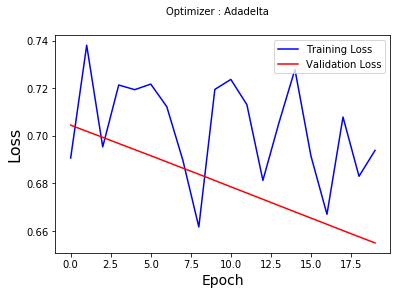

In [ ]:
#plotting Loss
plt.suptitle('Optimizer : Adadelta', fontsize=10)
plt.ylabel('Loss', fontsize=16)
plt.xlabel('Epoch', fontsize=14)
plt.plot(hist_adad.history['loss'], color='b', label='Training Loss')
plt.plot(hist_adad.history['val_loss'], color='r', label='Validation Loss')
plt.legend(loc='upper right')

In [ ]:
# DE MOVIES
VALIDATION_SPLIT = 0.2

indices = np.arange(transcript_pad.shape[0])
np.random.shuffle(indices)
transcript_pad = transcript_pad[indices]

sentiment = sentiment[indices]


num_validation_samples =  int(VALIDATION_SPLIT * transcript_pad.shape[0])
0.2*100

X_train_pad = transcript_pad[:-num_validation_samples]
y_train = sentiment[:-num_validation_samples]
X_test_pad = transcript_pad[-num_validation_samples:]
y_test = sentiment[-num_validation_samples:]


print("Sahpe X_train_pad",X_train_pad.shape)
print("Sahpe X_train_pad",X_train_pad[0])

print("Sahpe X_test_pad",X_test_pad.shape)
print("Sahpe y_test_pad",y_test.shape)
num_validation_samples

Sahpe X_train_pad (388, 15370)
Sahpe X_train_pad [   0    0    0 ...  240 3140  513]
Sahpe X_test_pad (96, 15370)
Sahpe y_test_pad (96,)


96